No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generating Yearly Plots


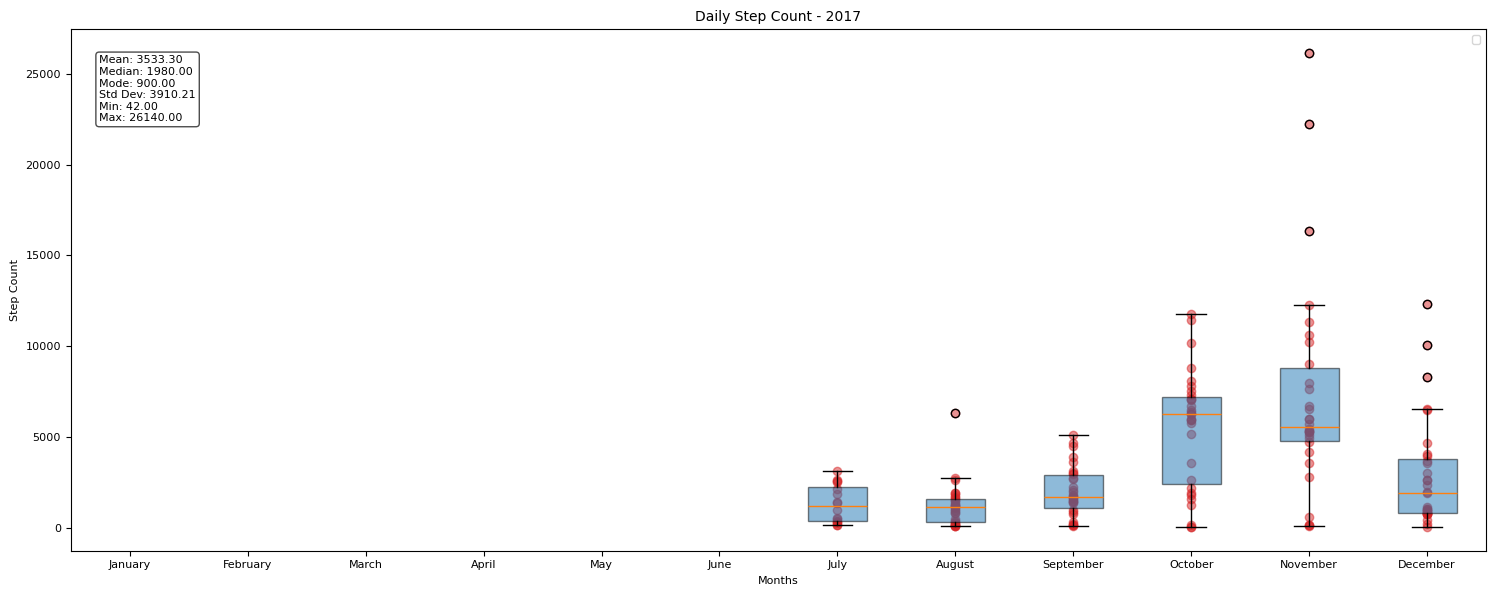

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


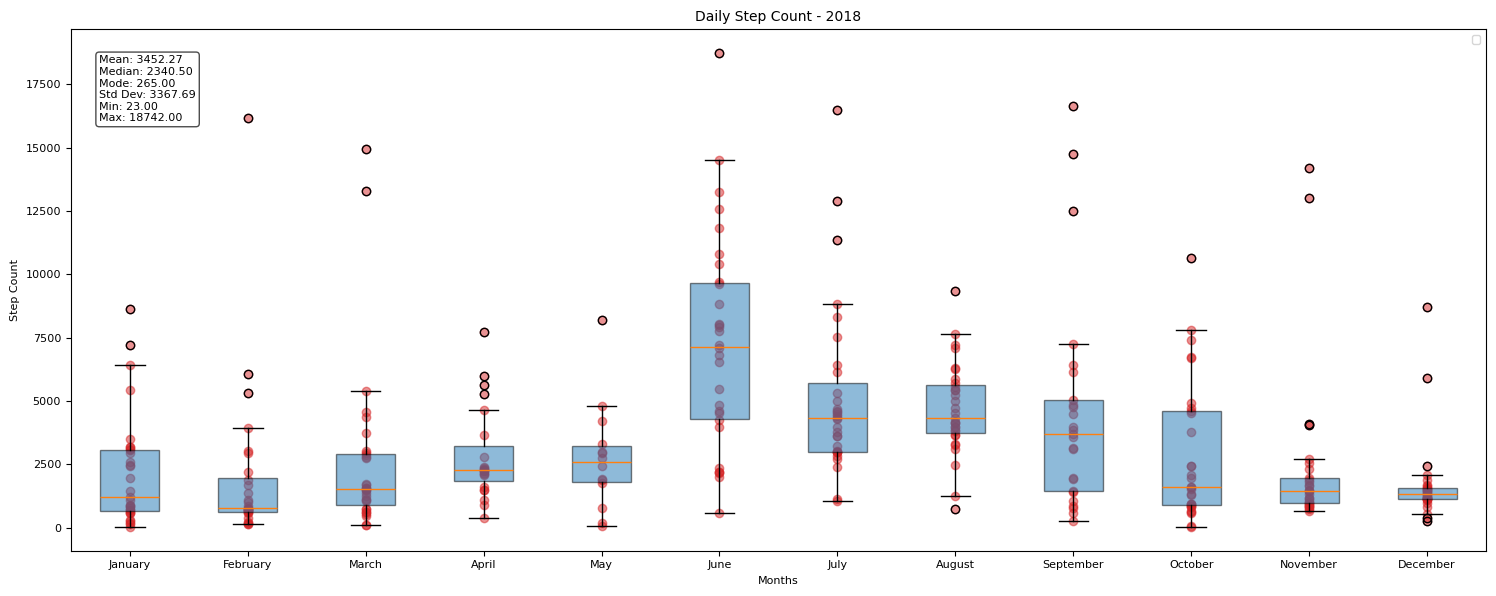

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


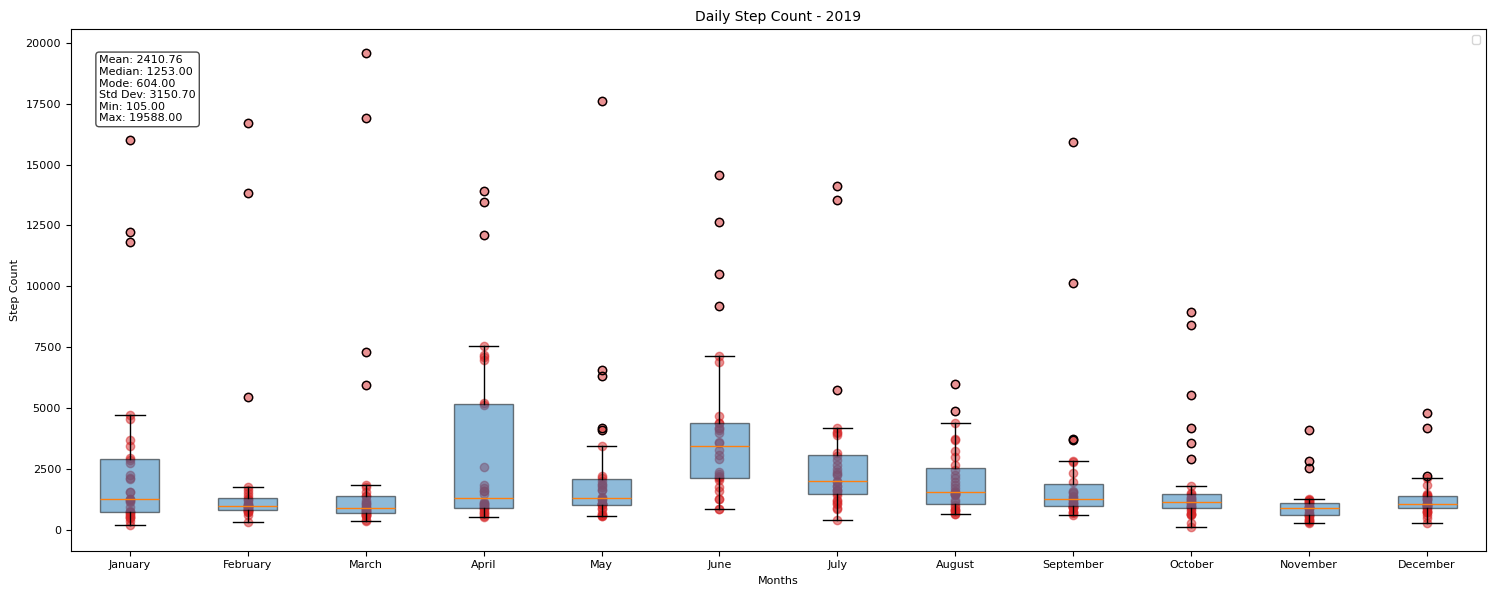

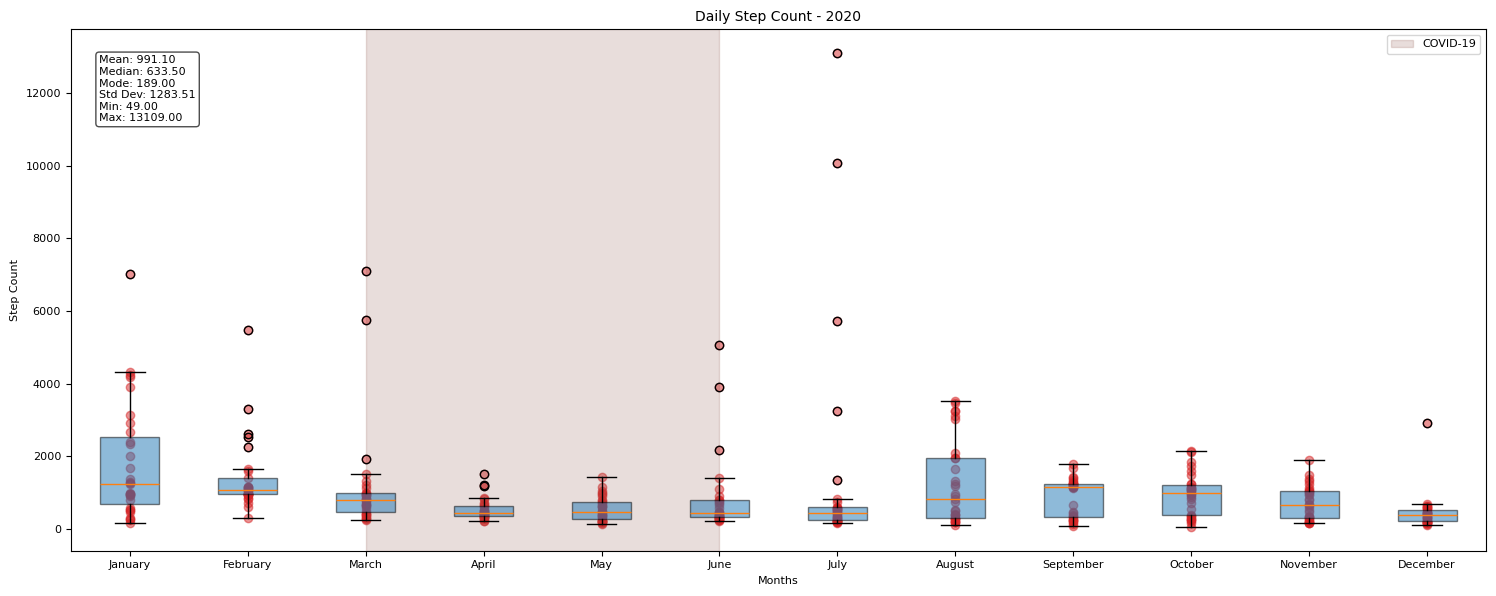

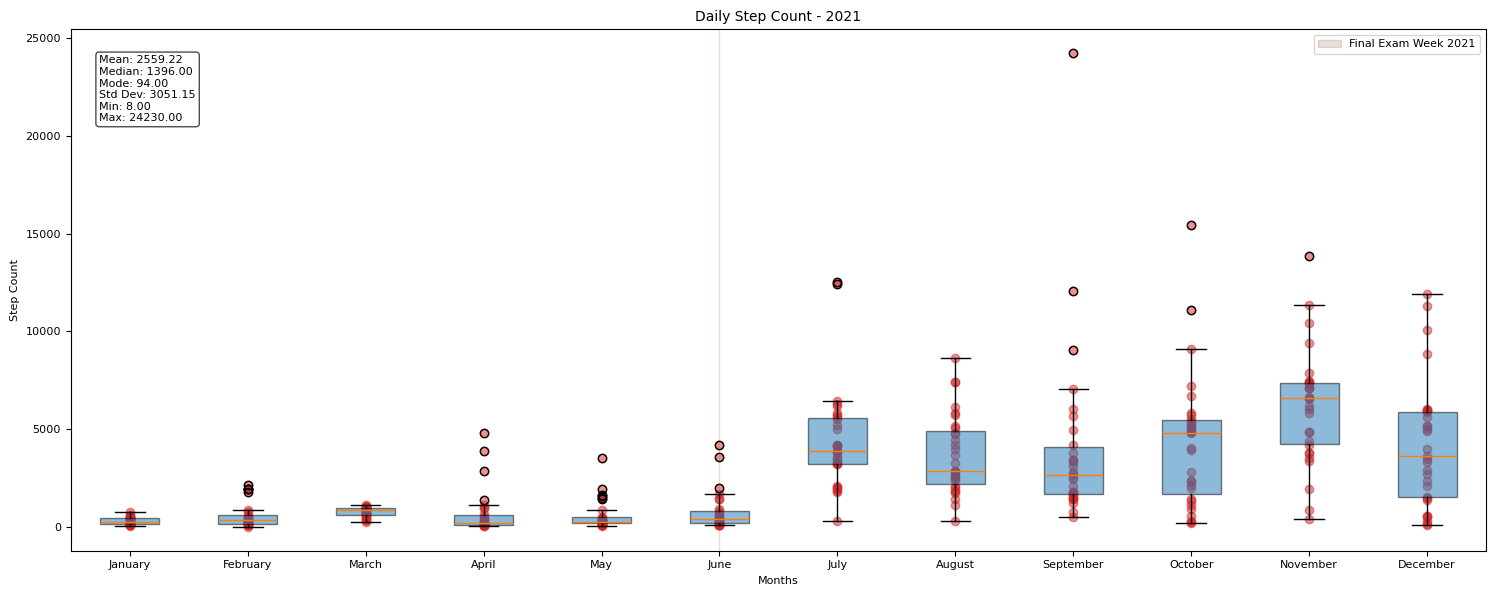

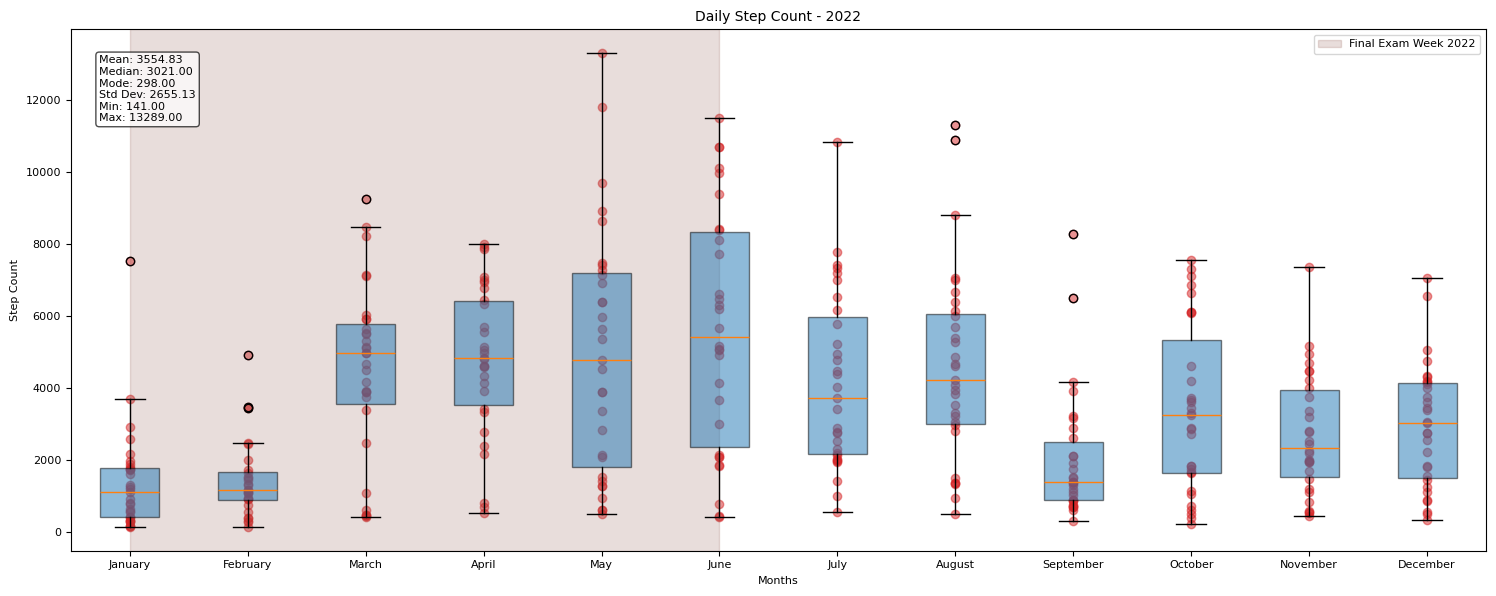

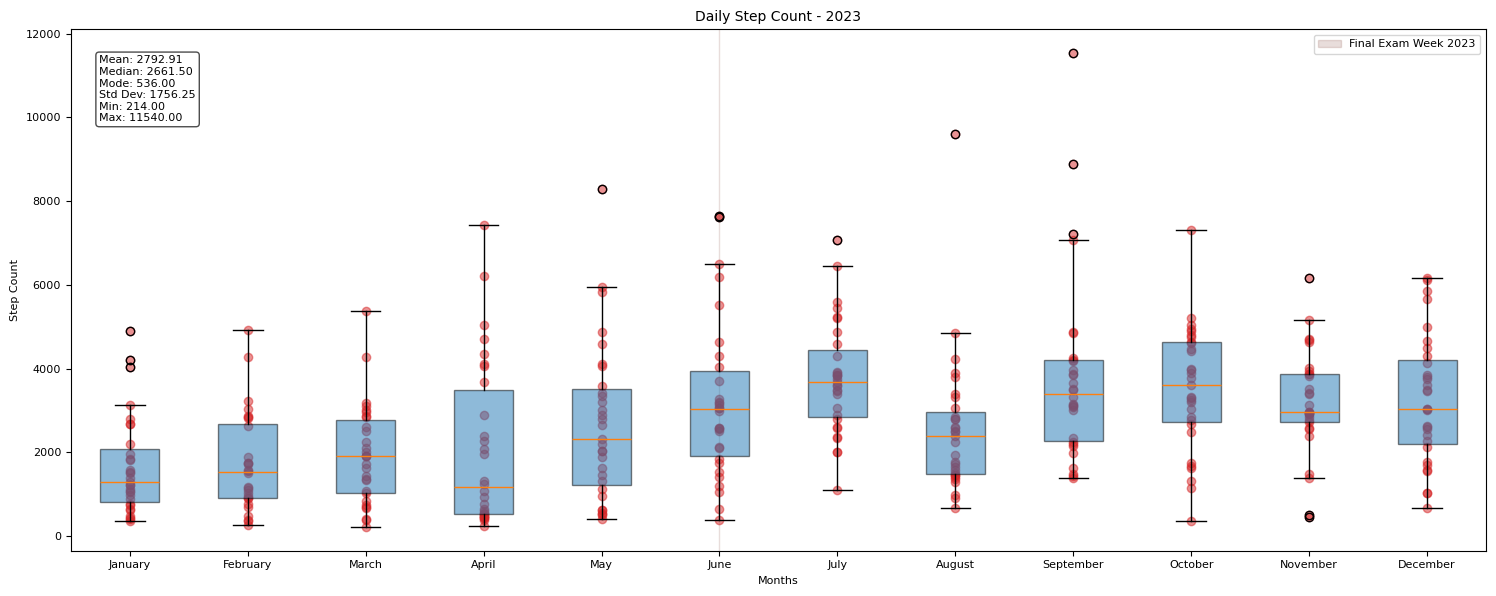

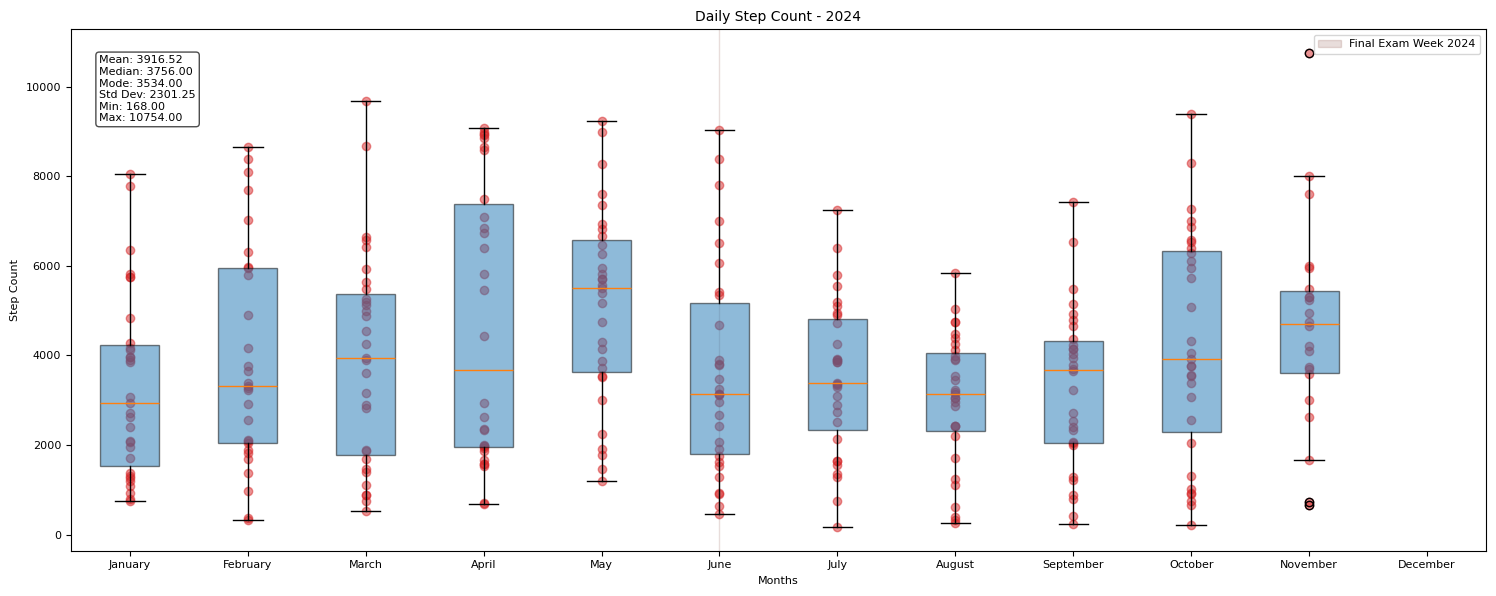

## Step Count Analysis Report

### Yearly Statistics
#### 2017 Year
- Mean: 3533.30
- Median: 1980.00
- Mode: 900.00
- Std Dev: 3910.21
- Min: 42.00
- Max: 26140.00

#### 2018 Year
- Mean: 3452.27
- Median: 2340.50
- Mode: 265.00
- Std Dev: 3367.69
- Min: 23.00
- Max: 18742.00

#### 2019 Year
- Mean: 2410.76
- Median: 1253.00
- Mode: 604.00
- Std Dev: 3150.70
- Min: 105.00
- Max: 19588.00

#### 2020 Year
- Mean: 991.10
- Median: 633.50
- Mode: 189.00
- Std Dev: 1283.51
- Min: 49.00
- Max: 13109.00

#### 2021 Year
- Mean: 2559.22
- Median: 1396.00
- Mode: 94.00
- Std Dev: 3051.15
- Min: 8.00
- Max: 24230.00

#### 2022 Year
- Mean: 3554.83
- Median: 3021.00
- Mode: 298.00
- Std Dev: 2655.13
- Min: 141.00
- Max: 13289.00

#### 2023 Year
- Mean: 2792.91
- Median: 2661.50
- Mode: 536.00
- Std Dev: 1756.25
- Min: 214.00
- Max: 11540.00

#### 2024 Year
- Mean: 3916.52
- Median: 3756.00
- Mode: 3534.00
- Std Dev: 2301.25
- Min: 168.00
- Max: 10754.00

### Period Statistics
#### COVID-19
- Mean

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

class StepCountAnalyzer:
    def __init__(self, xml_file_path):
        self.xml_file_path = xml_file_path
        self.step_data = None
        self.periods = {
            'COVID-19': {
                'start': datetime(2020, 3, 1),
                'end': datetime(2021, 6, 1)
            }
        }
        self.final_exam_weeks = {}
        
        # Use matplotlib's default style
        plt.style.use('default')
        mpl.rcParams['font.size'] = 8
        mpl.rcParams['axes.labelsize'] = 8
        mpl.rcParams['axes.titlesize'] = 10
        
        # Color palette
        self.color_palette = [
            '#1f77b4',  # blue
            '#ff7f0e',  # orange
            '#2ca02c',  # green
            '#d62728',  # red
            '#9467bd',  # purple
            '#8c564b',  # brown
            '#e377c2',  # pink
            '#7f7f7f',  # gray
            '#bcbd22',  # olive
            '#17becf'   # turquoise
        ]

    def parse_xml(self):
        """Parse XML and extract step count records"""
        tree = ET.parse(self.xml_file_path)
        root = tree.getroot()
        
        step_records = []
        for record in root.findall(".//Record[@type='HKQuantityTypeIdentifierStepCount']"):
            start_date = datetime.strptime(record.get('startDate'), '%Y-%m-%d %H:%M:%S %z')
            steps = int(record.get('value', 0))
            
            step_records.append({
                'date': start_date,
                'steps': steps
            })
        
        self.step_data = pd.DataFrame(step_records)
        self.step_data['date'] = pd.to_datetime(self.step_data['date'])
        
        # Daily total step count
        self.daily_steps = self.step_data.groupby(self.step_data['date'].dt.date)['steps'].sum().reset_index()
        self.daily_steps['date'] = pd.to_datetime(self.daily_steps['date'])

    def set_final_exam_weeks(self, years_weeks):
        """Get final exam weeks information from user"""
        self.final_exam_weeks = {}
        for year_week in years_weeks:
            year = year_week['year']
            week_start = datetime.strptime(f"{year_week['start']} Monday", "%Y-%m-%d %A")
            week_end = datetime.strptime(f"{year_week['end']} Sunday", "%Y-%m-%d %A")
            
            # Give a unique name to each final period
            period_name = f"Final Exam Week {year}"
            self.final_exam_weeks[period_name] = {
                'start': week_start,
                'end': week_end
            }
        
        # Add to periods
        self.periods.update(self.final_exam_weeks)

    def calculate_step_statistics(self, data):
        """Calculate step count statistics"""
        return {
            'Mean': data.mean(),
            'Median': data.median(),
            'Mode': data.mode().iloc[0] if not data.mode().empty else np.nan,
            'Std Dev': data.std(),
            'Min': data.min(),
            'Max': data.max()
        }

    def visualize_yearly_steps(self):
        """Visualize yearly step counts"""
        unique_years = self.daily_steps['date'].dt.year.unique()
        
        for year in unique_years:
            plt.figure(figsize=(15, 6))
            year_data = self.daily_steps[self.daily_steps['date'].dt.year == year]
            
            # Grouped data for each month
            monthly_data = [
                year_data[year_data['date'].dt.month == month]['steps'] 
                for month in range(1, 13)
            ]
            
            # Box plot
            plt.boxplot(monthly_data, 
                        labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                'July', 'August', 'September', 'October', 'November', 'December'],
                        patch_artist=True,
                        boxprops=dict(facecolor=self.color_palette[0], alpha=0.5))
            
            # Scatter plot
            for month in range(1, 13):
                month_data = year_data[year_data['date'].dt.month == month]
                if not month_data.empty:
                    plt.scatter([month]*len(month_data), month_data['steps'], 
                                alpha=0.5, 
                                color=self.color_palette[3])
            
            # Statistical information
            stats = self.calculate_step_statistics(year_data['steps'])
            stats_text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])
            plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
                     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            plt.title(f'Daily Step Count - {year}')
            plt.xlabel('Months')
            plt.ylabel('Step Count')
            
            # Period highlighting
            for period_name, period_range in self.periods.items():
                if period_range['start'].year == year:
                    plt.axvspan(
                        period_range['start'].month, 
                        period_range['end'].month, 
                        alpha=0.2, 
                        color=self.color_palette[5],
                        label=period_name
                    )
            
            plt.legend()
            plt.tight_layout()
            plt.show()
            plt.close()  # Close open plots

    def visualize_monthly_steps(self):
        """Visualize monthly step counts"""
        unique_years_months = self.daily_steps.groupby([self.daily_steps['date'].dt.year, self.daily_steps['date'].dt.month])
        
        for (year, month), month_data in unique_years_months:
            plt.figure(figsize=(10, 6))
            
            # Histogram
            plt.hist(month_data['steps'], bins=10, 
                     color=self.color_palette[2], 
                     edgecolor='black', 
                     alpha=0.7)
            
            # Statistical information
            stats = self.calculate_step_statistics(month_data['steps'])
            stats_text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])
            plt.text(0.98, 0.95, stats_text, transform=plt.gca().transAxes, 
                     horizontalalignment='right',
                     verticalalignment='top', 
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            plt.title(f'{year} {self.get_month_name(month)} Step Count Distribution')
            plt.xlabel('Step Count')
            plt.ylabel('Frequency')
            
            # Period highlighting
            for period_name, period_range in self.periods.items():
                if period_range['start'].year == year and period_range['start'].month == month:
                    plt.axvline(x=stats['Mean'], 
                                color=self.color_palette[5], 
                                linestyle='--', 
                                label=period_name)
            
            plt.legend()
            plt.tight_layout()
            plt.show()
            plt.close()  # Close open plots

    def get_month_name(self, month_number):
        """Return month name based on month number"""
        months = [
            'January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
        return months[month_number - 1]

    def generate_report(self):
        """Generate report"""
        report = "## Step Count Analysis Report\n\n"
        
        # Yearly statistics
        report += "### Yearly Statistics\n"
        yearly_stats = self.daily_steps.groupby(self.daily_steps['date'].dt.year)['steps']
        for year, steps in yearly_stats:
            stats = self.calculate_step_statistics(steps)
            report += f"#### {year} Year\n"
            for stat, value in stats.items():
                report += f"- {stat}: {value:.2f}\n"
            report += "\n"
        
        # Period Statistics
        report += "### Period Statistics\n"
        for period_name, period_range in self.periods.items():
            period_data = self.daily_steps[
                (self.daily_steps['date'] >= period_range['start']) & 
                (self.daily_steps['date'] <= period_range['end'])
            ]
            
            if not period_data.empty:
                report += f"#### {period_name}\n"
                stats = self.calculate_step_statistics(period_data['steps'])
                for stat, value in stats.items():
                    report += f"- {stat}: {value:.2f}\n"
                report += "\n"
        
        return report

def main():
    # Fixed final exam weeks information
    years_weeks = [
        {'year': 2021, 'start': '2021-01-15', 'end': '2021-01-22'},
        {'year': 2021, 'start': '2021-06-07', 'end': '2021-06-15'},
        {'year': 2022, 'start': '2022-01-15', 'end': '2022-01-22'},
        {'year': 2022, 'start': '2022-06-15', 'end': '2022-01-22'},
        {'year': 2023, 'start': '2023-01-15', 'end': '2023-01-22'},
        {'year': 2023, 'start': '2023-06-01', 'end': '2021-06-15'},
        {'year': 2024, 'start': '2024-01-15', 'end': '2024-01-22'},
        {'year': 2024, 'start': '2024-06-01', 'end': '2024-06-15'}
    ]
    
    analyzer = StepCountAnalyzer('export.xml')
    analyzer.parse_xml()
    analyzer.set_final_exam_weeks(years_weeks)
    
    print("Generating Yearly Plots")
    analyzer.visualize_yearly_steps()
    
    #print("\nGenerating Monthly Plots")
    #analyzer.visualize_monthly_steps()
    
    # Generate and print the report
    report = analyzer.generate_report()
    print(report)

if __name__ == "__main__":
    main()

Generating Combined Yearly Plot


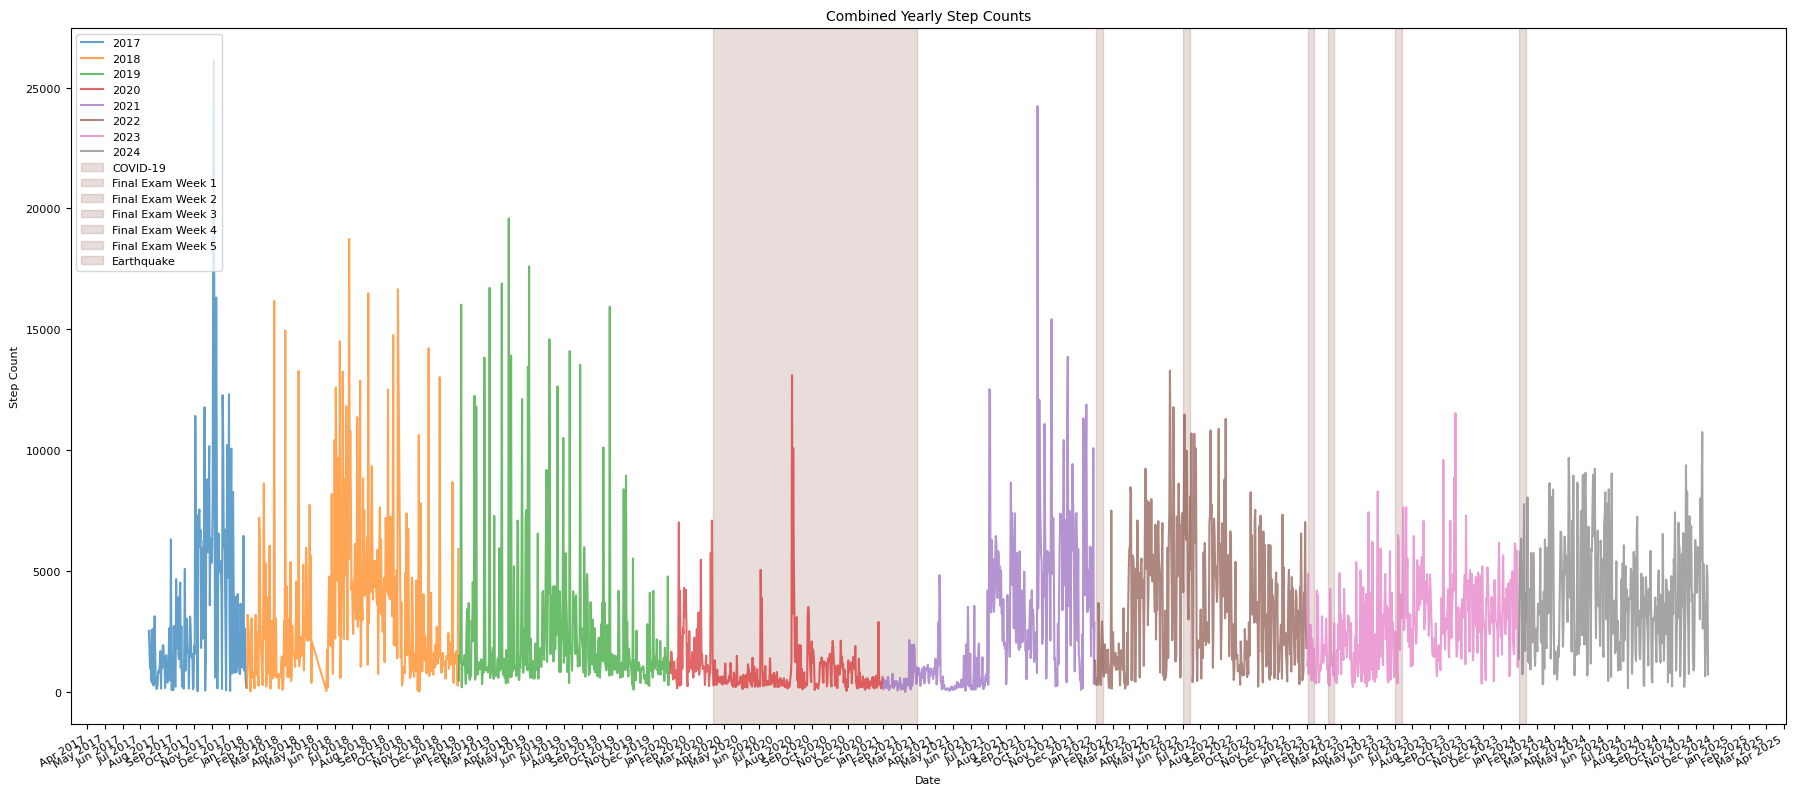

## Step Count Analysis Report

### Yearly Statistics
#### 2017 Year
- Mean: 3533.30
- Median: 1980.00
- Mode: 900.00
- Std Dev: 3910.21
- Min: 42.00
- Max: 26140.00

#### 2018 Year
- Mean: 3452.27
- Median: 2340.50
- Mode: 265.00
- Std Dev: 3367.69
- Min: 23.00
- Max: 18742.00

#### 2019 Year
- Mean: 2410.76
- Median: 1253.00
- Mode: 604.00
- Std Dev: 3150.70
- Min: 105.00
- Max: 19588.00

#### 2020 Year
- Mean: 991.10
- Median: 633.50
- Mode: 189.00
- Std Dev: 1283.51
- Min: 49.00
- Max: 13109.00

#### 2021 Year
- Mean: 2559.22
- Median: 1396.00
- Mode: 94.00
- Std Dev: 3051.15
- Min: 8.00
- Max: 24230.00

#### 2022 Year
- Mean: 3554.83
- Median: 3021.00
- Mode: 298.00
- Std Dev: 2655.13
- Min: 141.00
- Max: 13289.00

#### 2023 Year
- Mean: 2792.91
- Median: 2661.50
- Mode: 536.00
- Std Dev: 1756.25
- Min: 214.00
- Max: 11540.00

#### 2024 Year
- Mean: 3916.52
- Median: 3756.00
- Mode: 3534.00
- Std Dev: 2301.25
- Min: 168.00
- Max: 10754.00

### Period Statistics
#### COVID-19
- Mean

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

class StepCountAnalyzer:
    def __init__(self, xml_file_path):
        self.xml_file_path = xml_file_path
        self.step_data = None
        self.periods = {
            'COVID-19': {
                'start': datetime(2020, 3, 13),
                'end': datetime(2021, 3, 1)
            },
            'Final Exam Week 1': {
                'start': datetime(2022, 1, 2),
                'end': datetime(2022, 1, 14)
            },
            'Final Exam Week 2': {
                'start': datetime(2022, 6, 2),
                'end': datetime(2022, 6, 14)
            },
            'Final Exam Week 3': {
                'start': datetime(2023, 1, 2),
                'end': datetime(2023, 1, 14)
            },
            'Final Exam Week 4': {
                'start': datetime(2023, 6, 2),
                'end': datetime(2023, 6, 14)
            },
            'Final Exam Week 5': {
                'start': datetime(2024, 1, 2),
                'end': datetime(2024, 1, 14)
            },
            'Earthquake': {
                'start': datetime(2023, 2, 6),
                'end': datetime(2023, 2, 16)
            }
        }

        # Use matplotlib's default style
        plt.style.use('default')
        mpl.rcParams['font.size'] = 8
        mpl.rcParams['axes.labelsize'] = 8
        mpl.rcParams['axes.titlesize'] = 10

        # Color palette
        self.color_palette = [
            '#1f77b4',  # blue
            '#ff7f0e',  # orange
            '#2ca02c',  # green
            '#d62728',  # red
            '#9467bd',  # purple
            '#8c564b',  # brown
            '#e377c2',  # pink
            '#7f7f7f',  # gray
            '#bcbd22',  # olive
            '#17becf'   # turquoise
        ]

    def parse_xml(self):
        """Parse XML and extract step count records"""
        tree = ET.parse(self.xml_file_path)
        root = tree.getroot()

        step_records = []
        for record in root.findall(".//Record[@type='HKQuantityTypeIdentifierStepCount']"):
            start_date = datetime.strptime(record.get('startDate'), '%Y-%m-%d %H:%M:%S %z')
            steps = int(record.get('value', 0))

            step_records.append({
                'date': start_date,
                'steps': steps
            })

        self.step_data = pd.DataFrame(step_records)
        self.step_data['date'] = pd.to_datetime(self.step_data['date'])

        # Daily total step count
        self.daily_steps = self.step_data.groupby(self.step_data['date'].dt.date)['steps'].sum().reset_index()
        self.daily_steps['date'] = pd.to_datetime(self.daily_steps['date'])

    def calculate_step_statistics(self, data):
        """Calculate step count statistics"""
        return {
            'Mean': data.mean(),
            'Median': data.median(),
            'Mode': data.mode().iloc[0] if not data.mode().empty else np.nan,
            'Std Dev': data.std(),
            'Min': data.min(),
            'Max': data.max()
        }

    def visualize_combined_yearly_steps(self):
        """Visualize yearly step counts in a single plot with accurate period highlighting"""
        plt.figure(figsize=(18, 8))

        unique_years = self.daily_steps['date'].dt.year.unique()
        for idx, year in enumerate(unique_years):
            year_data = self.daily_steps[self.daily_steps['date'].dt.year == year]
            plt.plot(year_data['date'], year_data['steps'], label=f'{year}', alpha=0.7)

        # Period highlighting using exact dates
        for period_name, period_range in self.periods.items():
            start_date = period_range['start']
            end_date = period_range['end']
            plt.axvspan(start_date, end_date, alpha=0.2, color=self.color_palette[5], label=period_name)

        # Set x-axis to display months
        plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %Y'))
        plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator(interval=1))
        plt.gcf().autofmt_xdate()  # Rotate date labels

        plt.title('Combined Yearly Step Counts')
        plt.xlabel('Date')
        plt.ylabel('Step Count')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

    def generate_report(self):
        """Generate report"""
        report = "## Step Count Analysis Report\n\n"

        # Yearly statistics
        report += "### Yearly Statistics\n"
        yearly_stats = self.daily_steps.groupby(self.daily_steps['date'].dt.year)['steps']
        for year, steps in yearly_stats:
            stats = self.calculate_step_statistics(steps)
            report += f"#### {year} Year\n"
            for stat, value in stats.items():
                report += f"- {stat}: {value:.2f}\n"
            report += "\n"

        # Period Statistics
        report += "### Period Statistics\n"
        for period_name, period_range in self.periods.items():
            period_data = self.daily_steps[(
                self.daily_steps['date'] >= period_range['start']) & 
                (self.daily_steps['date'] <= period_range['end'])]

            if not period_data.empty:
                report += f"#### {period_name}\n"
                stats = self.calculate_step_statistics(period_data['steps'])
                for stat, value in stats.items():
                    report += f"- {stat}: {value:.2f}\n"
                report += "\n"

        return report

def main():
    analyzer = StepCountAnalyzer('export.xml')
    analyzer.parse_xml()

    print("Generating Combined Yearly Plot")
    analyzer.visualize_combined_yearly_steps()

    # Generate and print the report
    report = analyzer.generate_report()
    print(report)

if __name__ == "__main__":
    main()
